In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow as tf
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm_notebook


from scipy import stats

%matplotlib inline

/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/tensorf

In [2]:
mask_path = "/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/angle_training_180/504/masks/1_1969_3938_0_1969.png"
size = (224,224)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, size, cv2.INTER_NEAREST)

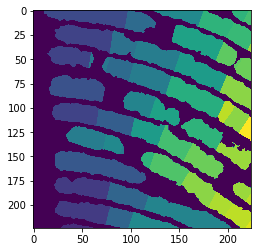

In [4]:
plt.imshow(mask)

In [49]:
def image_to_tensor(mask, max_norm = 0.1329807601338109, max_angle=180):
    stats.norm(30, 3).pdf(np.arange(0, 180))

In [56]:
result = np.zeros((size[0], size[1], 180))

In [6]:

max_norm = 0.1329807601338109
res_arr = []
for i in tqdm_notebook(mask.flatten()):
    if i != 0:
        res_arr.append(stats.norm(i, 3).pdf(np.arange(0, 180)) / max_norm)
    else:
        res_arr.append(np.zeros(180))

NameError: name 'stats' is not defined

In [146]:


def prepare_data(root_folder, size, save_folder):
    mask_names = os.listdir(root_folder)
    os.makedirs(save_folder, exist_ok=True)
    max_norm = 0.1329807601338109
    for mask_name in tqdm_notebook(mask_names):
        mask_path = os.path.join(root_folder, mask_name)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, size, cv2.INTER_NEAREST)

        res_arr = []
        for i in mask.flatten():
            if i != 0:
                res_arr.append(stats.norm(i, 3).pdf(np.arange(0, 180)) / max_norm)
            else:
                res_arr.append(np.zeros(180))
        result = np.array(res_arr).reshape((size[0], size[1], 180))
        save_path = os.path.join(save_folder, mask_name.replace(".png", ".npy"))
        np.save(save_path, result)

In [148]:
root_folder = "/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/angle_training_180/505/masks"
save_folder = "/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/angle_training_180/505/np_arrays"
size = (256,256)

prepare_data(root_folder, size, save_folder)

In [5]:
result = np.array(res_arr).reshape((size[0], size[1], 180))

NameError: name 'res_arr' is not defined

In [89]:
result.argmax()

1989

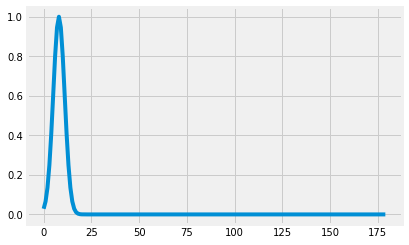

In [94]:
plt.plot(result[50, 50, :])

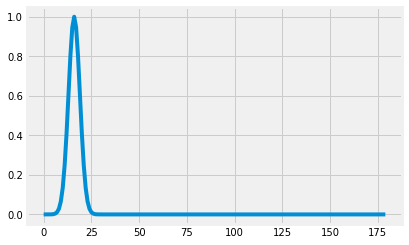

In [123]:
plt.plot(result[50, 60, :])

In [72]:
result.max()

1.0

In [ ]:
tf.keras.losses.binary_crossentropy

In [2]:
arr = np.load("/mnt/storage_4tb/ymi/geo_data/40m_for_ori/citrusuco/angle_training_180/504/np_arrays/1_1969_3938_0_1969.npy")

In [3]:
arr_2 = np.expand_dims(arr, axis=0)

In [23]:
def kld_loss(labels, predictions):
    mask = tf.cast(tf.not_equal(tf.reduce_sum(arr_2, axis=-1), 0), tf.float64)
    kl_loss = tf.losses.kullback_leibler_divergence(labels, predictions)
    kl_loss = kl_loss * mask
    kl_loss = tf.reduce_sum(kl_loss, axis=0)
    return tf.reduce_mean(kl_loss)

In [11]:
from tensorflow.keras.losses import binary_crossentropy, mean_squared_error, mean_absolute_error

def angle_rmse(pred, labels):
    pred = tf.cast(tf.argmax(pred, axis=-1), tf.float32)
    labels = tf.cast(tf.argmax(labels, axis=-1), tf.float32)
    mask = tf.cast(tf.not_equal(labels, 0), tf.float32)

    labels = labels * mask
    pred = pred * mask
    score = tf.math.sqrt(mean_squared_error(y_pred=pred, y_true=labels))
    score = tf.reduce_mean(score, axis=1)
    return score

In [15]:
tf.not_equal(tf.reduce_sum(arr_2, axis=-1), 0)

<tf.Tensor: id=79, shape=(1, 256, 256), dtype=bool, numpy=
array([[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]]])>

In [20]:
tf.losses.kullback_leibler_divergence(arr_2, arr_2)

<tf.Tensor: id=108, shape=(1, 256, 256), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])>

In [24]:
kld_loss(arr_2, arr_2)

<tf.Tensor: id=156, shape=(), dtype=float64, numpy=0.0>

In [10]:
angle_rmse(arr_2, arr_2)

<tf.Tensor: id=53, shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [26]:
tf.cast(tf.argmax(arr_2, axis=-1), tf.float32)

<tf.Tensor: id=124, shape=(1, 256, 256), dtype=float32, numpy=
array([[[ 0.,  0.,  0., ..., 28., 28., 28.],
        [ 0.,  0.,  0., ..., 28., 28., 28.],
        [ 0.,  0.,  0., ..., 28., 28., 28.],
        ...,
        [ 0.,  0.,  0., ..., 38., 38., 38.],
        [ 0.,  0.,  0., ..., 38., 38., 38.],
        [ 0.,  0.,  0., ..., 38., 38., 38.]]], dtype=float32)>

In [141]:
after_softmax = tf.nn.softmax(result, axis=-1)

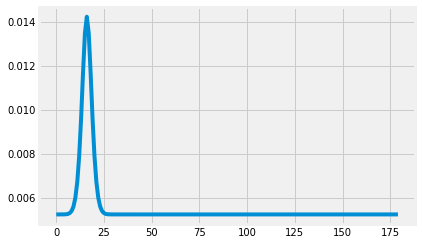

In [142]:
plt.plot(after_softmax[50, 60, :])

In [131]:
kl_loss

<tf.Tensor: id=896, shape=(224, 224), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [ ]:
tf.losses.binary_crossentropy()

In [59]:
stats.norm(mask, 3).pdf(np.arange(0, 180))

ValueError: operands could not be broadcast together with shapes (180,) (448,448) 

In [52]:
from scipy import stats
batch_x = list(map(lambda x: 
                    stats.norm(x, 3).pdf(np.arange(0, 180)), 
                    mask.flatten())
              )

KeyboardInterrupt: 

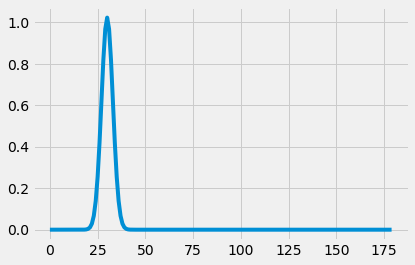

In [35]:
plt.plot(stats.norm(30, 3).pdf(np.arange(0, 180)) / 0.13)

In [48]:
stats.norm(30, 3).pdf(np.arange(0, 180))

array([2.56486621e-023, 6.80119956e-022, 1.61380619e-020, 3.42659119e-019,
       6.51055884e-018, 1.10692781e-016, 1.68409036e-015, 2.29274913e-014,
       2.79314024e-013, 3.04490680e-012, 2.97030006e-011, 2.59281602e-010,
       2.02529428e-009, 1.41562958e-008, 8.85433970e-008, 4.95573172e-007,
       2.48201529e-006, 1.11236208e-005, 4.46100753e-005, 1.60090217e-004,
       5.14092999e-004, 1.47728280e-003, 3.79866201e-003, 8.74062970e-003,
       1.79969888e-002, 3.31590463e-002, 5.46700249e-002, 8.06569082e-002,
       1.06482669e-001, 1.25794409e-001, 1.32980760e-001, 1.25794409e-001,
       1.06482669e-001, 8.06569082e-002, 5.46700249e-002, 3.31590463e-002,
       1.79969888e-002, 8.74062970e-003, 3.79866201e-003, 1.47728280e-003,
       5.14092999e-004, 1.60090217e-004, 4.46100753e-005, 1.11236208e-005,
       2.48201529e-006, 4.95573172e-007, 8.85433970e-008, 1.41562958e-008,
       2.02529428e-009, 2.59281602e-010, 2.97030006e-011, 3.04490680e-012,
       2.79314024e-013, 2

In [5]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [18]:
# define constants
mu = 1 
sigma = 0.5
x1 = 900
x2 = 1100

In [9]:
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [12]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

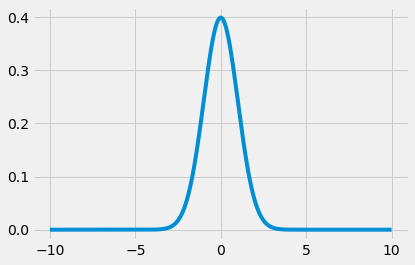

In [17]:
plt.plot(x_all, y2)

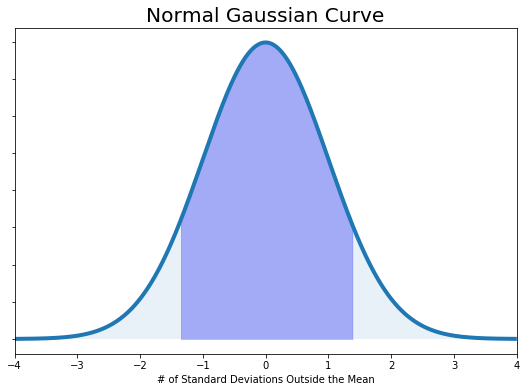

In [13]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

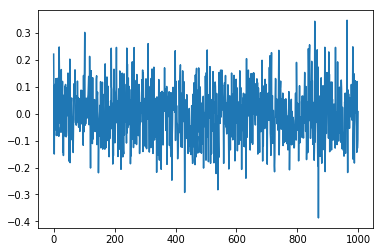

In [7]:
plt.plot(s)